In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.10G}'.format

import csv

In [11]:
df = pd.read_csv('./stanford-ner-2018-02-27/train_links/experimento_links_y_regexp/experimento_links_regexp_last/train_links.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )
df_result = pd.read_csv('./stanford-ner-2018-02-27/train_links/experimento_links_y_regexp/experimento_links_regexp_last/result_linked.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )
#df = pd.read_csv('./train_links.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )

In [12]:
df.head()

,0,1
0,COMISION,O
1,NACIONAL,O
2,DE,O
3,VALORES,O
4,Resolución,O


In [13]:
df.describe()

,0,1
count,464834,464834
unique,28823,9
top,de,O
freq,37934,452569


In [14]:
len(df)

464834

In [15]:
df_result.head()

,0,1,2
0,MINISTERIO,O,O
1,DE,O,O
2,MODERNIZACIÓN,O,O
3,OFICINA,O,O
4,NACIONAL,O,O


In [16]:
df_result.describe()

,0,1,2
count,462881,462881,462881
unique,32078,9,9
top,de,O,O
freq,37219,452023,453651


In [17]:
df[1].unique()

array(['O', 'LEY', 'DECRETO', 'RESOLUCIÓN', 'ARTÍCULO', 'EXPEDIENTE',
       'ENTITY', 'DISPOSICIÓN', 'DECISION'], dtype=object)

In [18]:
df_result[1].unique()

array(['O', 'LEY', 'DECRETO', 'ARTÍCULO', 'DISPOSICIÓN', 'RESOLUCIÓN',
       'ENTITY', 'EXPEDIENTE', 'DECISION'], dtype=object)

In [19]:
df_result[2].unique()

array(['O', 'LEY', 'DECRETO', 'ARTÍCULO', 'DISPOSICIÓN', 'RESOLUCIÓN',
       'EXPEDIENTE', 'ENTITY', 'DECISION'], dtype=object)

In [20]:
df_result[(df_result[1] == 'O')].count()

0    452023
1    452023
2    452023
dtype: int64

In [21]:
df_result[(df_result[1] == 'O') & (df_result[2] != 'O')].count()

0    1222
1    1222
2    1222
dtype: int64

In [22]:
df_O_error = df_result[(df_result[1] == 'O') & (df_result[2] != 'O')]

In [23]:
len(df_O_error)
(97319, 97695)
(97854, 98060)

235219 decreto sin el numero

1222

#### DE  127 a los que les asignó una clase y eran '0' solo 5 estaban mal y eran NaN

Index:
1 (104352)
1 (333505  )
1 (525236 )
1 525256
1(540936)


In [24]:
i = 0 
for index in df_O_error.index.values:
    print('---------------------------')
    print(df_result.loc[[index]])        
    print(df_result.loc[[index+1]])        
    print(df_result.loc[[index+2]]) 
    print('---------------------------')
    

---------------------------
            0  1         2
719  artículo  O  ARTÍCULO
       0  1         2
720  23,  O  ARTÍCULO
          0  1  2
721  inciso  O  O
---------------------------
---------------------------
       0  1         2
720  23,  O  ARTÍCULO
          0  1  2
721  inciso  O  O
       0  1  2
722  a),  O  O
---------------------------
---------------------------
            0  1         2
734  artículo  O  ARTÍCULO
       0  1         2
735  114  O  ARTÍCULO
       0  1  2
736  del  O  O
---------------------------
---------------------------
       0  1         2
735  114  O  ARTÍCULO
       0  1  2
736  del  O  O
              0  1  2
737  reglamento  O  O
---------------------------
---------------------------
           0  1        2
902  Decreto  O  DECRETO
      0  1        2
903  Nº  O  DECRETO
           0  1        2
904  1030/16  O  DECRETO
---------------------------
---------------------------
      0  1        2
903  Nº  O  DECRETO
           0  1       

        0  1  2
49997  de  O  O
---------------------------
---------------------------
            0  1    2
49996  18.838  O  LEY
        0  1  2
49997  de  O  O
            0  1  2
49998  1989).  O  O
---------------------------
---------------------------
              0  1         2
52560  artículo  O  ARTÍCULO
        0  1         2
52561  41  O  ARTÍCULO
        0  1  2
52562  En  O  O
---------------------------
---------------------------
        0  1         2
52561  41  O  ARTÍCULO
        0  1  2
52562  En  O  O
             0  1  2
52563  España,  O  O
---------------------------
---------------------------
              0  1         2
52884  artículo  O  ARTÍCULO
        0  1         2
52885  44  O  ARTÍCULO
        0  1  2
52886  La  O  O
---------------------------
---------------------------
        0  1         2
52885  44  O  ARTÍCULO
        0  1  2
52886  La  O  O
                     0  1  2
52887  indelegabilidad  O  O
---------------------------
----------------

95960  de  O  O
---------------------------
---------------------------
          0  1        2
95959  2275  O  DECRETO
        0  1  2
95960  de  O  O
           0  1  2
95961  fecha  O  O
---------------------------
---------------------------
              0  1         2
96261  Artículo  O  ARTÍCULO
       0  1         2
96262  8  O  ARTÍCULO
        0  1  2
96263  de  O  O
---------------------------
---------------------------
       0  1         2
96262  8  O  ARTÍCULO
        0  1  2
96263  de  O  O
        0  1  2
96264  la  O  O
---------------------------
---------------------------
              0  1         2
96681  Artículo  O  ARTÍCULO
       0  1         2
96682  8  O  ARTÍCULO
        0  1  2
96683  de  O  O
---------------------------
---------------------------
       0  1         2
96682  8  O  ARTÍCULO
        0  1  2
96683  de  O  O
        0  1  2
96684  la  O  O
---------------------------
---------------------------
         0  1    2
96794  Ley  O  LEY
        

97867  0,0  O  LEY
                0  1    2
97868  2837.11.00  O  LEY
---------------------------
---------------------------
         0  1    2
97867  0,0  O  LEY
                0  1    2
97868  2837.11.00  O  LEY
         0  1    2
97869  0,0  O  LEY
---------------------------
---------------------------
                0  1    2
97868  2837.11.00  O  LEY
         0  1    2
97869  0,0  O  LEY
                0  1    2
97870  2905.14.10  O  LEY
---------------------------
---------------------------
         0  1    2
97869  0,0  O  LEY
                0  1    2
97870  2905.14.10  O  LEY
         0  1    2
97871  6,0  O  LEY
---------------------------
---------------------------
                0  1    2
97870  2905.14.10  O  LEY
         0  1    2
97871  6,0  O  LEY
                0  1    2
97872  2905.31.00  O  LEY
---------------------------
---------------------------
         0  1    2
97871  6,0  O  LEY
                0  1    2
97872  2905.31.00  O  LEY
         0  1    2


         0  1    2
97915  8,0  O  LEY
                0  1    2
97916  2929.10.10  O  LEY
---------------------------
---------------------------
         0  1    2
97915  8,0  O  LEY
                0  1    2
97916  2929.10.10  O  LEY
         0  1    2
97917  4,0  O  LEY
---------------------------
---------------------------
                0  1    2
97916  2929.10.10  O  LEY
         0  1    2
97917  4,0  O  LEY
                0  1    2
97918  2931.00.37  O  LEY
---------------------------
---------------------------
         0  1    2
97917  4,0  O  LEY
                0  1    2
97918  2931.00.37  O  LEY
         0  1  2
97919  (3)  O  O
---------------------------
---------------------------
                0  1    2
97918  2931.00.37  O  LEY
         0  1  2
97919  (3)  O  O
         0  1    2
97920  4,0  O  LEY
---------------------------
---------------------------
         0  1    2
97920  4,0  O  LEY
                0  1    2
97921  2933.71.00  O  LEY
         0  1    2
979

                0  1    2
98002  7220.20.90  O  LEY
         0  1    2
98003  4,0  O  LEY
                0  1    2
98004  7225.11.00  O  LEY
---------------------------
---------------------------
         0  1    2
98003  4,0  O  LEY
                0  1    2
98004  7225.11.00  O  LEY
         0  1    2
98005  4,0  O  LEY
---------------------------
---------------------------
                0  1    2
98004  7225.11.00  O  LEY
         0  1    2
98005  4,0  O  LEY
                0  1    2
98006  7225.19.00  O  LEY
---------------------------
---------------------------
         0  1    2
98005  4,0  O  LEY
                0  1    2
98006  7225.19.00  O  LEY
         0  1    2
98007  4,0  O  LEY
---------------------------
---------------------------
                0  1    2
98006  7225.19.00  O  LEY
         0  1    2
98007  4,0  O  LEY
                0  1    2
98008  7226.99.00  O  LEY
---------------------------
---------------------------
         0  1    2
98007  4,0  O  LEY


         0  1  2
99490  del  O  O
---------------------------
---------------------------
            0  1           2
99489  102/03  O  RESOLUCIÓN
         0  1  2
99490  del  O  O
                0  1  2
99491  MINISTERIO  O  O
---------------------------
---------------------------
             0  1        2
99811  Decreto  O  DECRETO
        0  1        2
99812  N°  O  DECRETO
         0  1        2
99813  477  O  DECRETO
---------------------------
---------------------------
        0  1        2
99812  N°  O  DECRETO
         0  1        2
99813  477  O  DECRETO
         0  1  2
99814  del  O  O
---------------------------
---------------------------
         0  1        2
99813  477  O  DECRETO
         0  1  2
99814  del  O  O
        0  1  2
99815  22  O  O
---------------------------
---------------------------
              0  1        2
100358  Decreto  O  DECRETO
         0  1        2
100359  N°  O  DECRETO
         0  1        2
100360  67  O  DECRETO
------------------

109548  Artículo  O  ARTÍCULO
          0  1         2
109549  18,  O  ARTÍCULO
         0  1  2
109550  de  O  O
---------------------------
---------------------------
          0  1         2
109549  18,  O  ARTÍCULO
         0  1  2
109550  de  O  O
         0  1  2
109551  la  O  O
---------------------------
---------------------------
               0  1         2
112174  artículo  O  ARTÍCULO
          0  1         2
112175  65,  O  ARTÍCULO
              0  1  2
112176  incisos  O  O
---------------------------
---------------------------
          0  1         2
112175  65,  O  ARTÍCULO
              0  1  2
112176  incisos  O  O
           0  1  2
112177  3.c)  O  O
---------------------------
---------------------------
               0  1         2
112528  artículo  O  ARTÍCULO
          0  1         2
112529  53,  O  ARTÍCULO
             0  1  2
112530  inciso  O  O
---------------------------
---------------------------
          0  1         2
112529  53,  O  ARTÍCULO


          0  1    2
203284  Ley  O  LEY
         0  1    2
203285  Nº  O  LEY
              0  1    2
203286  19.640,  O  LEY
---------------------------
---------------------------
         0  1    2
203285  Nº  O  LEY
              0  1    2
203286  19.640,  O  LEY
          0  1  2
203287  sus  O  O
---------------------------
---------------------------
              0  1    2
203286  19.640,  O  LEY
          0  1  2
203287  sus  O  O
                     0  1  2
203288  modificatorias  O  O
---------------------------
---------------------------
          0  1    2
204230  Ley  O  LEY
         0  1    2
204231  Nº  O  LEY
             0  1    2
204232  19.640  O  LEY
---------------------------
---------------------------
         0  1    2
204231  Nº  O  LEY
             0  1    2
204232  19.640  O  LEY
        0  1  2
204233  y  O  O
---------------------------
---------------------------
             0  1    2
204232  19.640  O  LEY
        0  1  2
204233  y  O  O
          0 

            0  1           2
225123  27/02  O  RESOLUCIÓN
---------------------------
---------------------------
         0  1           2
225122  Nº  O  RESOLUCIÓN
            0  1           2
225123  27/02  O  RESOLUCIÓN
         0  1  2
225124  de  O  O
---------------------------
---------------------------
            0  1           2
225123  27/02  O  RESOLUCIÓN
         0  1  2
225124  de  O  O
         0  1  2
225125  la  O  O
---------------------------
---------------------------
                 0  1           2
225272  Resolución  O  RESOLUCIÓN
         0  1           2
225273  Nº  O  RESOLUCIÓN
            0  1           2
225274  27/02  O  RESOLUCIÓN
---------------------------
---------------------------
         0  1           2
225273  Nº  O  RESOLUCIÓN
            0  1           2
225274  27/02  O  RESOLUCIÓN
         0  1  2
225275  de  O  O
---------------------------
---------------------------
            0  1           2
225274  27/02  O  RESOLUCIÓN
         0  

          0  1  2
235220  NÂ°  O  O
          0  1  2
235221  584  O  O
---------------------------
---------------------------
              0  1        2
235236  Decreto  O  DECRETO
          0  1  2
235237  NÂ°  O  O
          0  1  2
235238  924  O  O
---------------------------
---------------------------
               0  1         2
237313  Artículo  O  ARTÍCULO
         0  1         2
237314  37  O  ARTÍCULO
          0  1  2
237315  del  O  O
---------------------------
---------------------------
         0  1         2
237314  37  O  ARTÍCULO
          0  1  2
237315  del  O  O
              0  1  2
237316  Decreto  O  O
---------------------------
---------------------------
               0  1         2
237371  artículo  O  ARTÍCULO
         0  1         2
237372  38  O  ARTÍCULO
          0  1  2
237373  que  O  O
---------------------------
---------------------------
         0  1         2
237372  38  O  ARTÍCULO
          0  1  2
237373  que  O  O
          0  1  2
23

             0  1    2
254906  26.363  O  LEY
---------------------------
---------------------------
         0  1    2
254905  Nº  O  LEY
             0  1    2
254906  26.363  O  LEY
          0  1  2
254907  fue  O  O
---------------------------
---------------------------
             0  1    2
254906  26.363  O  LEY
          0  1  2
254907  fue  O  O
             0  1  2
254908  creada  O  O
---------------------------
---------------------------
               0  1         2
255121  artículo  O  ARTÍCULO
        0  1         2
255122  8  O  ARTÍCULO
         0  1  2
255123  de  O  O
---------------------------
---------------------------
        0  1         2
255122  8  O  ARTÍCULO
         0  1  2
255123  de  O  O
         0  1  2
255124  la  O  O
---------------------------
---------------------------
               0  1         2
255211  artículo  O  ARTÍCULO
        0  1         2
255212  8  O  ARTÍCULO
         0  1  2
255213  de  O  O
---------------------------
--------

             0  1    2
281748  25.564  O  LEY
         0  1  2
281749  de  O  O
---------------------------
---------------------------
             0  1    2
281748  25.564  O  LEY
         0  1  2
281749  de  O  O
               0  1  2
281750  creación  O  O
---------------------------
---------------------------
          0  1    2
281776  Ley  O  LEY
         0  1    2
281777  N°  O  LEY
             0  1    2
281778  25.564  O  LEY
---------------------------
---------------------------
         0  1    2
281777  N°  O  LEY
             0  1    2
281778  25.564  O  LEY
              0  1  2
281779  faculta  O  O
---------------------------
---------------------------
             0  1    2
281778  25.564  O  LEY
              0  1  2
281779  faculta  O  O
         0  1  2
281780  al  O  O
---------------------------
---------------------------
          0  1    2
281844  Ley  O  LEY
             0  1    2
281845  25.564  O  LEY
                      0  1  2
281846  (estampillado)

298628  11,  O  ARTÍCULO
             0  1  2
298629  inciso  O  O
          0  1  2
298630  a),  O  O
---------------------------
---------------------------
               0  1         2
299553  Artículo  O  ARTÍCULO
         0  1         2
299554  37  O  ARTÍCULO
              0  1        2
299555  Decreto  O  DECRETO
---------------------------
---------------------------
         0  1         2
299554  37  O  ARTÍCULO
              0  1        2
299555  Decreto  O  DECRETO
         0  1        2
299556  Nº  O  DECRETO
---------------------------
---------------------------
              0  1        2
299555  Decreto  O  DECRETO
         0  1        2
299556  Nº  O  DECRETO
           0  1        2
299557  2284  O  DECRETO
---------------------------
---------------------------
         0  1        2
299556  Nº  O  DECRETO
           0  1        2
299557  2284  O  DECRETO
         0  1  2
299558  de  O  O
---------------------------
---------------------------
           0  1      

         0  1        2
320418  N°  O  DECRETO
             0  1        2
320419  433/94  O  DECRETO
                    0  1  2
320420  reglamentario  O  O
---------------------------
---------------------------
             0  1        2
320419  433/94  O  DECRETO
                    0  1  2
320420  reglamentario  O  O
          0  1  2
320421  del  O  O
---------------------------
---------------------------
              0  1        2
320759  Decreto  O  DECRETO
         0  1        2
320760  N°  O  DECRETO
              0  1        2
320761  1273/02  O  DECRETO
---------------------------
---------------------------
         0  1        2
320760  N°  O  DECRETO
              0  1        2
320761  1273/02  O  DECRETO
        0  1  2
320762  y  O  O
---------------------------
---------------------------
              0  1        2
320761  1273/02  O  DECRETO
        0  1  2
320762  y  O  O
         0  1  2
320763  su  O  O
---------------------------
---------------------------
    

              0  1        2
328095  1273/02  O  DECRETO
        0  1  2
328096  y  O  O
---------------------------
---------------------------
              0  1        2
328095  1273/02  O  DECRETO
        0  1  2
328096  y  O  O
         0  1  2
328097  su  O  O
---------------------------
---------------------------
              0  1        2
328570  Decreto  O  DECRETO
         0  1        2
328571  N°  O  DECRETO
              0  1        2
328572  1034/01  O  DECRETO
---------------------------
---------------------------
         0  1        2
328571  N°  O  DECRETO
              0  1        2
328572  1034/01  O  DECRETO
        0  1  2
328573  y  O  O
---------------------------
---------------------------
              0  1        2
328572  1034/01  O  DECRETO
        0  1  2
328573  y  O  O
         0  1  2
328574  su  O  O
---------------------------
---------------------------
          0  1    2
328835  Ley  O  LEY
         0  1    2
328836  N°  O  LEY
             0  1 

              0  1        2
340738  Decreto  O  DECRETO
         0  1        2
340739  N°  O  DECRETO
               0  1        2
340740  1129/01.  O  DECRETO
---------------------------
---------------------------
         0  1        2
340739  N°  O  DECRETO
               0  1        2
340740  1129/01.  O  DECRETO
                       0  1  2
340741  Comercialización  O  O
---------------------------
---------------------------
               0  1        2
340740  1129/01.  O  DECRETO
                       0  1  2
340741  Comercialización  O  O
         0  1  2
340742  de  O  O
---------------------------
---------------------------
              0  1        2
340866  Decreto  O  DECRETO
         0  1        2
340867  N°  O  DECRETO
              0  1        2
340868  1016/97  O  DECRETO
---------------------------
---------------------------
         0  1        2
340867  N°  O  DECRETO
              0  1        2
340868  1016/97  O  DECRETO
              0  1  2
340869  dispon

         0  1  2
367645  se  O  O
                 0  1  2
367646  sustituirá  O  O
---------------------------
---------------------------
               0  1         2
367738  artículo  O  ARTÍCULO
          0  1         2
367739  10,  O  ARTÍCULO
              0  1  2
367740  segundo  O  O
---------------------------
---------------------------
          0  1         2
367739  10,  O  ARTÍCULO
              0  1  2
367740  segundo  O  O
               0  1  2
367741  párrafo,  O  O
---------------------------
---------------------------
               0  1         2
367868  artículo  O  ARTÍCULO
          0  1         2
367869  18.  O  ARTÍCULO
        0  1  2
367870  A  O  O
---------------------------
---------------------------
          0  1         2
367869  18.  O  ARTÍCULO
        0  1  2
367870  A  O  O
          0  1  2
367871  tal  O  O
---------------------------
---------------------------
               0  1         2
368384  artículo  O  ARTÍCULO
          0  1        

379098  documentación  O  O
---------------------------
---------------------------
              0  1        2
379702  Decreto  O  DECRETO
         0  1        2
379703  N°  O  DECRETO
           0  1        2
379704  1912  O  DECRETO
---------------------------
---------------------------
         0  1        2
379703  N°  O  DECRETO
           0  1        2
379704  1912  O  DECRETO
         0  1  2
379705  de  O  O
---------------------------
---------------------------
           0  1        2
379704  1912  O  DECRETO
         0  1  2
379705  de  O  O
            0  1  2
379706  fecha  O  O
---------------------------
---------------------------
                 0  1           2
379868  Resolución  O  RESOLUCIÓN
         0  1           2
379869  N°  O  RESOLUCIÓN
             0  1           2
379870  613/94  O  RESOLUCIÓN
---------------------------
---------------------------
         0  1           2
379869  N°  O  RESOLUCIÓN
             0  1           2
379870  613/94  O  RESOL

419107  Ley  O  LEY
              0  1    2
419108  24.156,  O  LEY
         0  1  2
419109  de  O  O
---------------------------
---------------------------
              0  1    2
419108  24.156,  O  LEY
         0  1  2
419109  de  O  O
                     0  1  2
419110  Administración  O  O
---------------------------
---------------------------
               0  1         2
424172  artículo  O  ARTÍCULO
          0  1         2
424173  12,  O  ARTÍCULO
              0  1  2
424174  párrafo  O  O
---------------------------
---------------------------
          0  1         2
424173  12,  O  ARTÍCULO
              0  1  2
424174  párrafo  O  O
               0  1  2
424175  tercero,  O  O
---------------------------
---------------------------
              0  1        2
424394  Decreto  O  DECRETO
         0  1        2
424395  N°  O  DECRETO
              0  1        2
424396  1099/98  O  DECRETO
---------------------------
---------------------------
         0  1        2
424

446488  originados  O  O
---------------------------
---------------------------
              0  1    2
446487  23.982,  O  LEY
                 0  1  2
446488  originados  O  O
         0  1  2
446489  en  O  O
---------------------------
---------------------------
               0  1         2
446674  artículo  O  ARTÍCULO
         0  1         2
446675  58  O  ARTÍCULO
         0  1  2
446676  de  O  O
---------------------------
---------------------------
         0  1         2
446675  58  O  ARTÍCULO
         0  1  2
446676  de  O  O
         0  1  2
446677  la  O  O
---------------------------
---------------------------
          0  1    2
446706  Ley  O  LEY
             0  1    2
446707  23.982  O  LEY
        0  1  2
446708  y  O  O
---------------------------
---------------------------
             0  1    2
446707  23.982  O  LEY
        0  1  2
446708  y  O  O
         0  1  2
446709  el  O  O
---------------------------
---------------------------
          0  1    2

In [29]:
df_result.iloc[97310:97325]

,0,1,2
97310,(N.C.M.),O,O
97311,que,O,O
97312,se,O,O
97313,consignan,O,O
97314,a,O,O
97315,continuación.,O,O
97316,NCM,O,O
97317,DIE,O,O
97318,(%),O,O
97319,2812.10.11,O,LEY


In [30]:
df_result[df_result[1] == 'O'].count()

0    452023
1    452023
2    452023
dtype: int64

In [31]:
df_result[df_result[1] == 'INSTRUCCION'].count()

0    0
1    0
2    0
dtype: int64

In [32]:
df_result[df_result[1] == 'DECISION'].count()

0    336
1    336
2    336
dtype: int64

In [33]:
df_result[df_result[1] == 'DECRETO'].count()

0    1369
1    1369
2    1369
dtype: int64

In [36]:
from sklearn.metrics import classification_report

target_names = ['DECISION', 'LEY', 'DECRETO', 'RESOLUCION', 'ARTÍCULO', 'EXPEDIENTE','DISPOSICIÓN', 'ENTITY', 'O']
print(classification_report(df_result[1], df_result[2], target_names=target_names))

             precision    recall  f1-score   support

   DECISION       0.88      0.84      0.86      3293
        LEY       1.00      1.00      1.00       336
    DECRETO       0.80      0.67      0.73      1369
 RESOLUCION       0.98      0.57      0.72       181
   ARTÍCULO       0.98      0.65      0.79       497
 EXPEDIENTE       1.00      0.73      0.85        15
DISPOSICIÓN       0.78      0.70      0.74      2529
     ENTITY       0.99      1.00      1.00    452023
          O       0.94      0.66      0.78      2638

avg / total       0.99      0.99      0.99    462881



In [39]:
count_decretos = df_result[df_result[1] == 'DECISION'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'DECISION') & (df_result[2] == 'DECISION')][2].count() 
print('coverage en DECISION: ', count_predict_decretos/count_decretos)

coverage en DECISION:  1.0


In [40]:
count_decretos = df_result[df_result[1] == 'LEY'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'LEY') & (df_result[2] == 'LEY')][2].count() 
print('coverage en ley: ', count_predict_decretos/count_decretos)

coverage en DECISION:  0.7046263345195729


In [41]:
count_decretos = df_result[df_result[1] == 'DECRETO'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'DECRETO') & (df_result[2] == 'DECRETO')][2].count() 
print('coverage en decretos: ', count_predict_decretos/count_decretos)

coverage en decretos:  0.6676406135865596


In [44]:
count_decretos = df_result[df_result[1] == 'RESOLUCIÓN'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'RESOLUCIÓN') & (df_result[2] == 'RESOLUCIÓN')][2].count() 
print('coverage en resoluciÓn: ', count_predict_decretos/count_decretos)

coverage en resoluciÓn:  0.6622441243366186


In [45]:
count_decretos = df_result[df_result[1] == 'ARTÍCULO'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'ARTÍCULO') & (df_result[2] == 'ARTÍCULO')][2].count() 
print('coverage en ARTÍCULO: ', count_predict_decretos/count_decretos)

coverage en ARTÍCULO:  0.843000303674461


In [46]:
count_decretos = df_result[df_result[1] == 'EXPEDIENTE'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'EXPEDIENTE') & (df_result[2] == 'EXPEDIENTE')][2].count() 
print('coverage en EXPEDIENTE: ', count_predict_decretos/count_decretos)

coverage en EXPEDIENTE:  0.7333333333333333


In [47]:
count_decretos = df_result[df_result[1] == 'DISPOSICIÓN'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'DISPOSICIÓN') & (df_result[2] == 'DISPOSICIÓN')][2].count() 
print('coverage en DISPOSICIÓN: ', count_predict_decretos/count_decretos)

coverage en DISPOSICIÓN:  0.569060773480663


In [48]:
count_decretos = df_result[df_result[1] == 'ENTITY'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'ENTITY') & (df_result[2] == 'ENTITY')][2].count() 
print('coverage en entity: ', count_predict_decretos/count_decretos)

coverage en entity:  0.6539235412474849


In [49]:
count_decretos = df_result[df_result[1] == 'O'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'O') & (df_result[2] == 'O')][2].count() 
print('coverage en O: ', count_predict_decretos/count_decretos)

coverage en O:  0.9972965977394955


In [50]:
df[df[1] == 'ENTITY'].count()

0    793
1    793
dtype: int64

In [51]:
df_result[df_result[1] == 'ENTITY'].count()

0    497
1    497
2    497
dtype: int64

In [52]:
df[df[1] == 'INSTRUCCION'].count()

0    0
1    0
dtype: int64

In [53]:
df_result[df_result[1] == 'INSTRUCCION'].count()

0    0
1    0
2    0
dtype: int64

In [54]:
df_result[df_result[1] == 'DECISION'].count()

0    336
1    336
2    336
dtype: int64

In [55]:
df[df[1] == 'DECISION'].count()

0    680
1    680
dtype: int64

In [56]:
df[df[1] == 'DECRETO'].count()

0    1527
1    1527
dtype: int64

In [57]:
df_result[df_result[1] == 'DECRETO'].count()

0    1369
1    1369
2    1369
dtype: int64

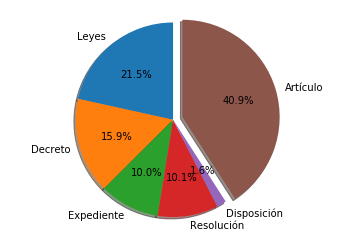

In [93]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Leyes', 'Decreto', 'Expediente', 'Resolución', 'Disposición', 'Artículo'
sizes = [21.55, 15.92, 10, 10.05, 1.58, 40.9]
explode = (0, 0, 0, 0, 0 ,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()